# Rishi Raj 22M0033

# 1. 

In [ ]:
import jax.numpy as np # importing the jax library

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for parameter initialization
def f(params, x):
    w0 = params[:8]
    b0 = params[8:16]
    w1 = params[16:24]
    b1 = params[25]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

In [ ]:
# Initialize the parameters randomly
from jax import random
#pseudo-random number generator (PRNG) provided by JAX
key = random.PRNGKey(0)
params = random.normal(key, shape=(25,))

In [ ]:
# Determine derivative of f with respect to x
from jax import grad

dfdx = grad(f,1)

epoch:   0 loss: 0.926425
epoch: 100 loss: 0.063477
epoch: 200 loss: 0.014685
epoch: 300 loss: 0.002623
epoch: 400 loss: 0.000417
epoch: 500 loss: 0.000200
epoch: 600 loss: 0.000063
epoch: 700 loss: 0.000038
epoch: 800 loss: 0.000015
epoch: 900 loss: 0.000011


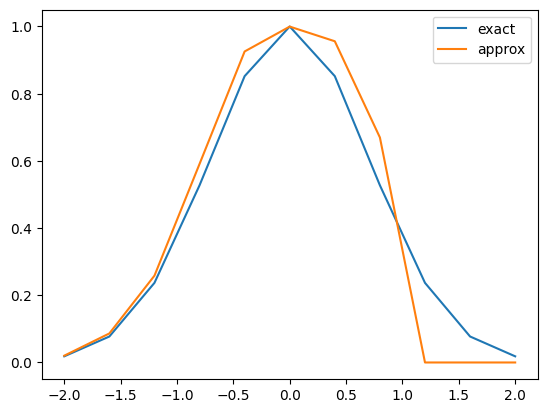

epoch:   0 loss: 0.384915
epoch: 100 loss: 0.069656
epoch: 200 loss: 0.012795
epoch: 300 loss: 0.008949
epoch: 400 loss: 0.003409
epoch: 500 loss: 0.002722
epoch: 600 loss: 0.001885
epoch: 700 loss: 0.001617
epoch: 800 loss: 0.001525
epoch: 900 loss: 0.001420


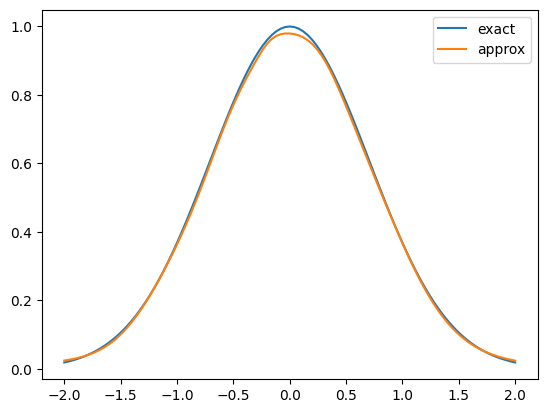

In [ ]:
grids = [11,101] # Defining the number of grid points to be considered

for i in grids:
    inputs = np.linspace(-2., 2., num=i)
    from jax import vmap
    f_vect = vmap(f, (None, 0)) # 0 indicates the mapped axis. It is column axis currently.
    dfdx_vect = vmap(dfdx, (None, 0))

    from jax import jit
    @jit
    def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq**2) + np.mean(ic**2)


    grad_loss = jit(grad(loss, 0))

    # Run the model
    epochs = 1000
    learning_rate = 0.1
    momentum = 0.99
    velocity = 0.
    for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity


    # Plot
    import matplotlib.pyplot as plt
    plt.plot(inputs, np.exp(-inputs**2), label='exact')
    plt.plot(inputs, f_vect(params, inputs), label='approx')
    
    plt.legend()
    plt.show()


The differences between the 10 and 100 grid point findings are very apparent. The NN was unable to approximate the value of the function in relation to the analytical results for 10 grid points. In contrast, the NN could provide the function's results more correctly in the instance of 100 grid points compared to the analytical solution.

## b.

### 1. Taking 5 neutons in the hidden layers

epoch:   0 loss: 1.136540
epoch: 100 loss: 0.167745
epoch: 200 loss: 0.018303
epoch: 300 loss: 0.018911
epoch: 400 loss: 0.007821
epoch: 500 loss: 0.005765
epoch: 600 loss: 0.004641
epoch: 700 loss: 0.003880
epoch: 800 loss: 0.003400
epoch: 900 loss: 0.003008


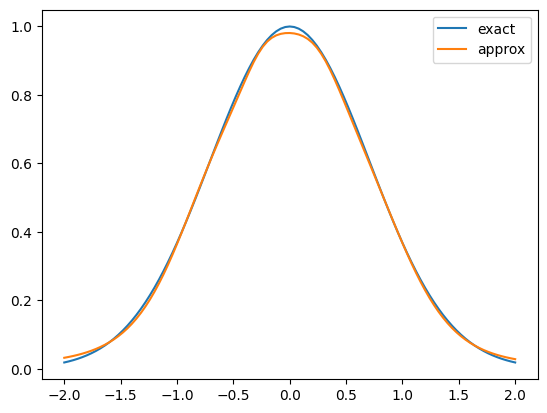

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for parameter initialization
def f1(params1, x):
    w0 = params1[:5]
    b0 = params1[5:10]
    w1 = params1[10:15]
    b1 = params1[16]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

key = random.PRNGKey(0)
params1 = random.normal(key, shape=(16,))

dfdx1 = grad(f1,1)

inputs1 = np.linspace(-2., 2., num=101)
from jax import vmap
f_vect1 = vmap(f1, (None, 0)) # 0 indicates the mapped axis. It is column axis currently.
dfdx_vect1 = vmap(dfdx1, (None, 0))

from jax import jit
@jit
def loss1(params1, inputs1):
    eq1 = dfdx_vect1(params1, inputs1) + 2.*inputs1*f_vect1(params1, inputs1)
    ic1 = f1(params1, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq1**2) + np.mean(ic1**2)
  
grad_loss1 = jit(grad(loss1, 0))

  # Run the model
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
    print('epoch: %3d loss: %.6f' % (epoch, loss1(params1, inputs1)))
    gradient = grad_loss1(params1 + momentum*velocity, inputs1)
    velocity = momentum*velocity - learning_rate*gradient
    params1 += velocity

  
  # Plot
import matplotlib.pyplot as plt
plt.plot(inputs1, np.exp(-inputs1**2), label='exact')
plt.plot(inputs1, f_vect1(params1, inputs1), label='approx')
plt.legend()
plt.show()


### 2. Taking 20 neutrons

epoch:   0 loss: 3.972859
epoch: 100 loss: 1.000000
epoch: 200 loss: nan
epoch: 300 loss: nan
epoch: 400 loss: nan
epoch: 500 loss: nan
epoch: 600 loss: nan
epoch: 700 loss: nan
epoch: 800 loss: nan
epoch: 900 loss: nan


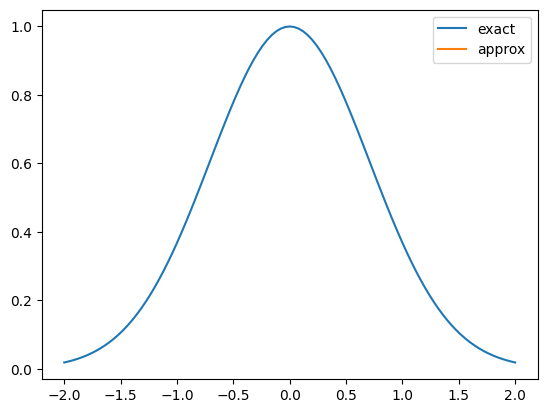

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for parameter initialization
def f1(params1, x):
    w0 = params1[:20]
    b0 = params1[20:40]
    w1 = params1[40:60]
    b1 = params1[61]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

key = random.PRNGKey(0)
params1 = random.normal(key, shape=(61,))

dfdx1 = grad(f1,1)

inputs1 = np.linspace(-2., 2., num=101)
from jax import vmap
f_vect1 = vmap(f1, (None, 0)) # 0 indicates the mapped axis. It is column axis currently.
dfdx_vect1 = vmap(dfdx1, (None, 0))

from jax import jit
@jit
def loss1(params1, inputs1):
    eq1 = dfdx_vect1(params1, inputs1) + 2.*inputs1*f_vect1(params1, inputs1)
    ic1 = f1(params1, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq1**2) + np.mean(ic1**2)

grad_loss1 = jit(grad(loss1, 0))

  # Run the model
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
    print('epoch: %3d loss: %.6f' % (epoch, loss1(params1, inputs1)))
    gradient = grad_loss1(params1 + momentum*velocity, inputs1)
    velocity = momentum*velocity - learning_rate*gradient
    params1 += velocity

  
  # Plot
import matplotlib.pyplot as plt
plt.plot(inputs1, np.exp(-inputs1**2), label='exact')
plt.plot(inputs1, f_vect1(params1, inputs1), label='approx')
plt.legend()
plt.show()


From the above two graphs, we can observe that for the case of 20 neurons, it is not showing any results whereas for 5 neurons it shows the plot whose results are very much closer to the exact analytical solution

### c.

### Taking case 1: −2 ≤ x <≤ 2

epoch:   0 loss: 0.917509
epoch: 100 loss: 0.031432
epoch: 200 loss: 0.016826
epoch: 300 loss: 0.012816
epoch: 400 loss: 0.004466
epoch: 500 loss: 0.003045
epoch: 600 loss: 0.002355
epoch: 700 loss: 0.002043
epoch: 800 loss: 0.001834
epoch: 900 loss: 0.001707


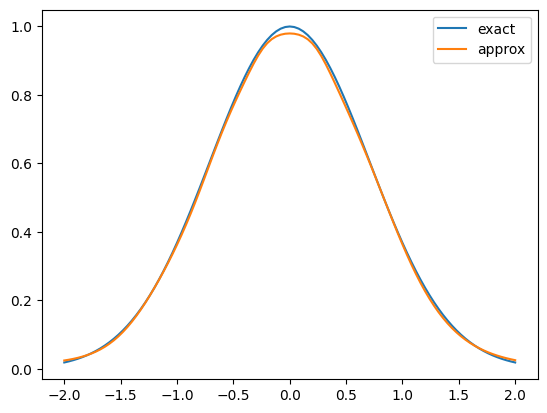

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for parameter initialization
def f1(params1, x):
    w0 = params1[:8]
    b0 = params1[8:16]
    w1 = params1[16:24]
    b1 = params1[25]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

key = random.PRNGKey(0)
params1 = random.normal(key, shape=(25,))

dfdx1 = grad(f1,1)

inputs1 = np.linspace(-2., 2., num=101)
from jax import vmap
f_vect1 = vmap(f1, (None, 0)) # 0 indicates the mapped axis. It is column axis currently.
dfdx_vect1 = vmap(dfdx1, (None, 0))

from jax import jit
@jit
def loss1(params1, inputs1):
    eq1 = dfdx_vect1(params1, inputs1) + 2.*inputs1*f_vect1(params1, inputs1)
    ic1 = f1(params1, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq1**2) + np.mean(ic1**2)

grad_loss1 = jit(grad(loss1, 0))

  # Run the model
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
    print('epoch: %3d loss: %.6f' % (epoch, loss1(params1, inputs1)))
    gradient = grad_loss1(params1 + momentum*velocity, inputs1)
    velocity = momentum*velocity - learning_rate*gradient
    params1 += velocity

  
  # Plot
import matplotlib.pyplot as plt
plt.plot(inputs1, np.exp(-inputs1**2), label='exact')
plt.plot(inputs1, f_vect1(params1, inputs1), label='approx')
plt.legend()
plt.show()


### Taking case 2: −20 ≤ x ≤ 20

epoch:   0 loss: 2.992818
epoch: 100 loss: nan
epoch: 200 loss: nan
epoch: 300 loss: nan
epoch: 400 loss: nan
epoch: 500 loss: nan
epoch: 600 loss: nan
epoch: 700 loss: nan
epoch: 800 loss: nan
epoch: 900 loss: nan


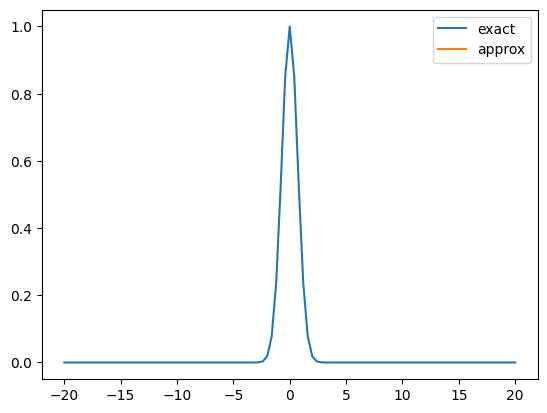

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for parameter initialization
def f1(params1, x):
    w0 = params1[:8]
    b0 = params1[8:16]
    w1 = params1[16:24]
    b1 = params1[25]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

key = random.PRNGKey(0)
params1 = random.normal(key, shape=(25,))

dfdx1 = grad(f1,1)

inputs1 = np.linspace(-20., 20., num=101)
from jax import vmap
f_vect1 = vmap(f1, (None, 0)) # 0 indicates the mapped axis. It is column axis currently.
dfdx_vect1 = vmap(dfdx1, (None, 0))

from jax import jit
@jit
def loss1(params1, inputs1):
    eq1 = dfdx_vect1(params1, inputs1) + 2.*inputs1*f_vect1(params1, inputs1)
    ic1 = f1(params1, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq1**2) + np.mean(ic1**2)
  
grad_loss1 = jit(grad(loss1, 0))

  # Run the model
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
    print('epoch: %3d loss: %.6f' % (epoch, loss1(params1, inputs1)))
    gradient = grad_loss1(params1 + momentum*velocity, inputs1)
    velocity = momentum*velocity - learning_rate*gradient
    params1 += velocity

  
  # Plot
import matplotlib.pyplot as plt
plt.plot(inputs1, np.exp(-inputs1**2), label='exact')
plt.plot(inputs1, f_vect1(params1, inputs1), label='approx')
plt.legend()
plt.show()


According to the above plots, the NN is capable of calculating the value of the function for the case 2 x 2 that is quite near to the analytical values. However, in the case of 20 x 20, the NN was unable to determine the values of the function and displayed nan instead.

# 2.


In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time

In [ ]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [ ]:
def init_random_params(layer_sizes):
    rs=npr.RandomState(0)
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize),   # weight matrix
             rs.randn(outsize))           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]
# The above line will run the for loop from insize to outsize, and will store the values 
# layer_sizes[:-1] fills the weight matrix
# layer_sizes[1:] fills the bias array 

In [ ]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [ ]:
# initial guess for params:
params = init_random_params(layer_sizes=[1, 10, 1])

In [ ]:
layer_sizes=[1, 8, 1]
print(layer_sizes[1:])

[8, 1]


In [ ]:
dydx = elementwise_grad(y, 1) # partial derivative of y with respect to inputs i.e. x

In [ ]:
y0 = 1.0
x = np.linspace(-2, 2).reshape((-1, 1))

In [ ]:
# Define the objective function.
def lossfunction(params,step):
    # The objective is to minimize to zero.
    # dydx = -2xy
#    ycall = y(params,inputs)
    zeq = dydx(params, x) + (2*x**3)+np.exp(-x)
    y0 = 1.0
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2 + ic**2)

In [ ]:
def callback(params,step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [ ]:
#ODE solver for 8 nodes
# grad(losfunciton) = d J(theta) / d theta
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

Iteration   0 lossfunction 24.81162804115976
Iteration 100 lossfunction 0.08284730222939038
Iteration 200 lossfunction 0.013804198524300251
Iteration 300 lossfunction 0.006042722626973945
Iteration 400 lossfunction 0.0026627637762562262
Iteration 500 lossfunction 0.001999838344427943
Iteration 600 lossfunction 0.0013624733311127816
Iteration 700 lossfunction 0.0017638931439774997
Iteration 800 lossfunction 0.0010578566563172714
Iteration 900 lossfunction 0.018401909550078557


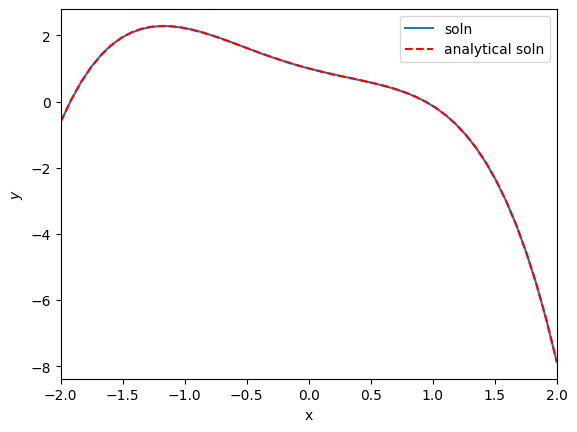

In [ ]:
#Plot for 8 nodes
tfit = np.linspace(-2, 2).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit,(((-tfit**4)/2)+np.exp(-tfit)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])
plt.savefig('odenn.png')